### AI and Deep Learning Program Project:Seedlings Classification by Computer Vision using Convolutional Neural Network CNN

In [ ]:
!pip install opencv-python

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, ReLU, Softmax, BatchNormalization, Dropout, MaxPooling2D
from tensorflow.keras.applications import vgg16
#from keras.applications.vgg16 import VGG16
from tensorflow.keras import backend
from tensorflow.keras.utils import load_img, to_categorical, img_to_array, array_to_img
from tensorflow.keras.preprocessing import image_dataset_from_directory 
from keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import os
import PIL
from PIL import Image
#from google.colab.patches import cv2_imshow
import cv2
import random

In [30]:
import random
np.random.seed(1) #for numpy
random.seed(1) 
tf.random.set_seed(1) #for tensorflow

In [32]:
from tensorflow.keras import backend
backend.clear_session()

In [1]:
#(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

In [36]:
#from sklearn.preprocessing import LabelBinarizer

In [37]:
# lb = LabelBinarizer() 
# # Applying fit_transform on train target variable
# trainy_e = lb.fit_transform(trainy)

In [ ]:
# Mounting the drive
from google.colab import drive
#drive.mount('/content/drive/')

In [103]:
# Loading the path of the image
#image_path = '/content/drive/MyDrive/AI&DL/Projects/test_image.png'
image_path = 'images.npy'

### Load the image and label data

In [104]:
# load the images using the numpy load function since the images are stored in a numpy file
image_data = np.load(image_path)

In [105]:
# find out the number of images, pixel dimensions of each image,and if image is color or greyscale
image_data.shape

(4750, 128, 128, 3)

In [223]:
# inspect a sample image
image_data[0]

array([[[ 35,  52,  78],
        [ 36,  49,  76],
        [ 31,  45,  69],
        ...,
        [ 78,  95, 114],
        [ 76,  93, 110],
        [ 80,  95, 109]],

       [[ 33,  46,  68],
        [ 37,  50,  73],
        [ 48,  65,  83],
        ...,
        [ 81,  96, 113],
        [ 74,  89, 105],
        [ 83,  95, 109]],

       [[ 34,  50,  68],
        [ 35,  52,  72],
        [ 70,  85, 101],
        ...,
        [ 83,  97, 112],
        [ 79,  94, 108],
        [ 79,  94, 107]],

       ...,

       [[ 35,  50,  69],
        [ 42,  57,  73],
        [ 42,  57,  72],
        ...,
        [ 60,  76,  92],
        [ 67,  81,  97],
        [ 64,  77,  95]],

       [[ 36,  52,  67],
        [ 48,  63,  78],
        [ 41,  57,  73],
        ...,
        [ 44,  66,  83],
        [ 58,  76,  91],
        [ 57,  74,  90]],

       [[ 44,  58,  70],
        [ 43,  57,  73],
        [ 40,  55,  72],
        ...,
        [ 41,  70,  92],
        [ 55,  78,  97],
        [ 61,  79,  96]]

### There are 4750  128 by 128 pixel RGB color images in the appropriate structure to be manipulated by the tensorflow keras library

In [7]:
# load the label data ie the target classes data
label_data = pd.read_csv('Labels.csv')

In [190]:
label_data.sample(10)

Label
879                     Fat Hen
1805           Common Chickweed
70    Small-flowered Cranesbill
2814          Scentless Mayweed
1649           Common Chickweed
3220          Scentless Mayweed
2512                   Cleavers
3530                 Sugar beet
2699                   Cleavers
4431           Loose Silky-bent

### Examine to see the proportion of the classes of plant seedlings

In [12]:
label_data.value_counts()

Label                    
Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Common wheat                 221
Maize                        221
dtype: int64

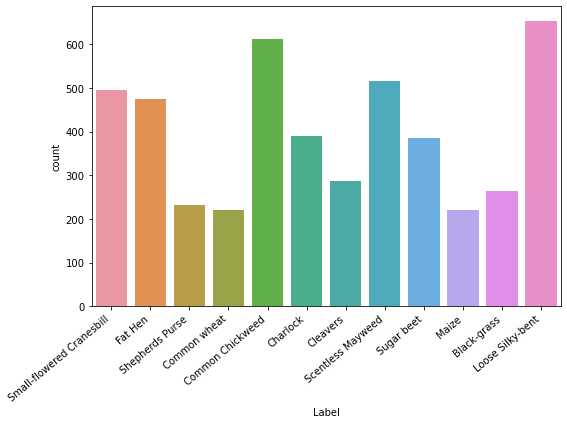

In [21]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x='Label', data=label_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

### Although not extreme, there is class imbalance
* The top two most occuring plants are almost thrice the number of the least occuring plants.

### Preview the images from each class

In [86]:
# get a list of the unique classes
unique_labels = label_data.value_counts().reset_index()['Label'].to_list()

In [88]:
unique_labels

['Loose Silky-bent',
 'Common Chickweed',
 'Scentless Mayweed',
 'Small-flowered Cranesbill',
 'Fat Hen',
 'Charlock',
 'Sugar beet',
 'Cleavers',
 'Black-grass',
 'Shepherds Purse',
 'Common wheat',
 'Maize']

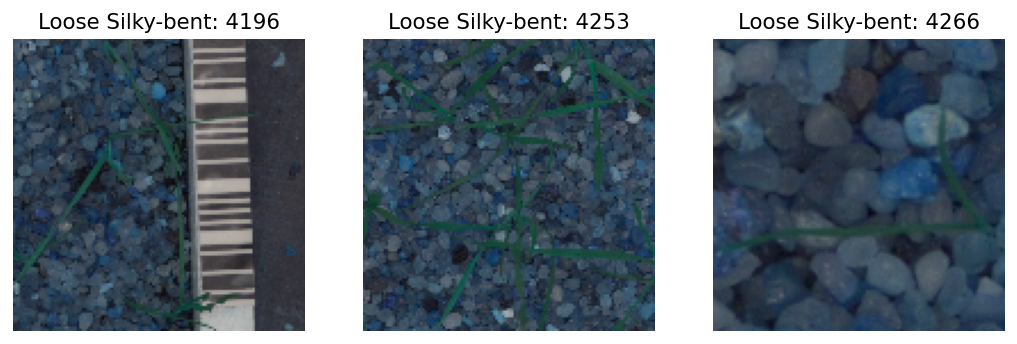

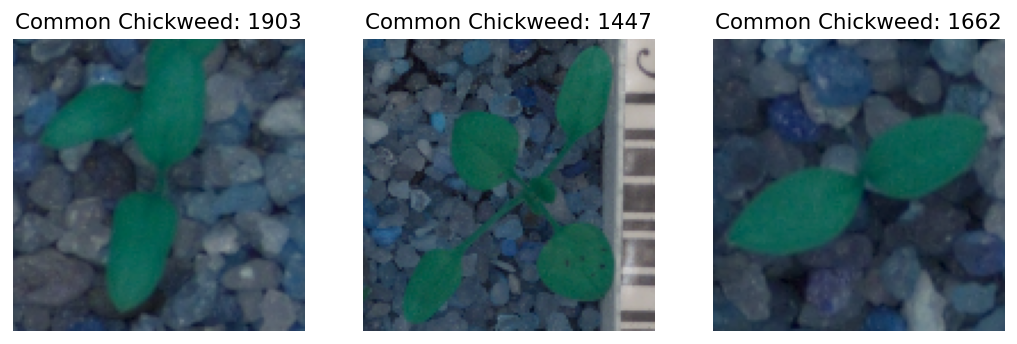

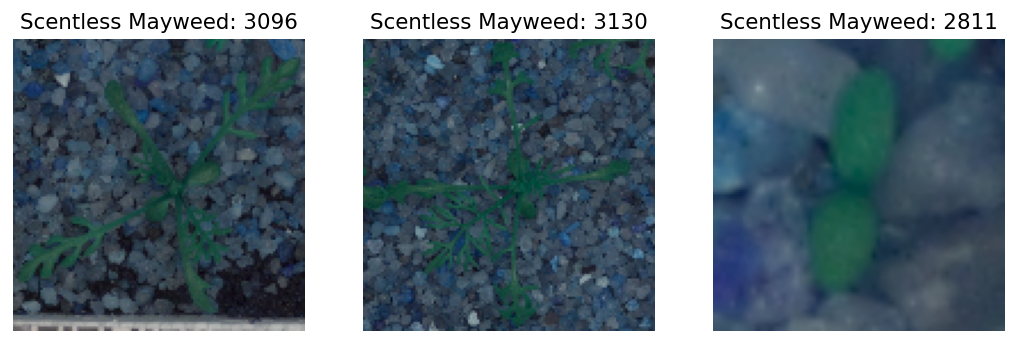

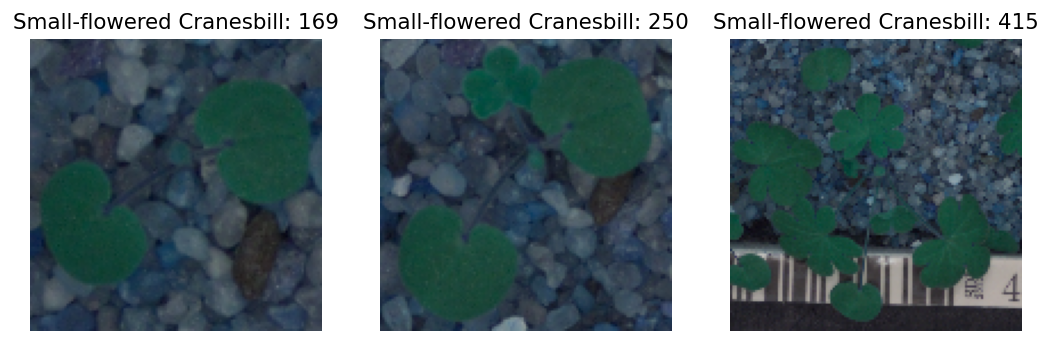

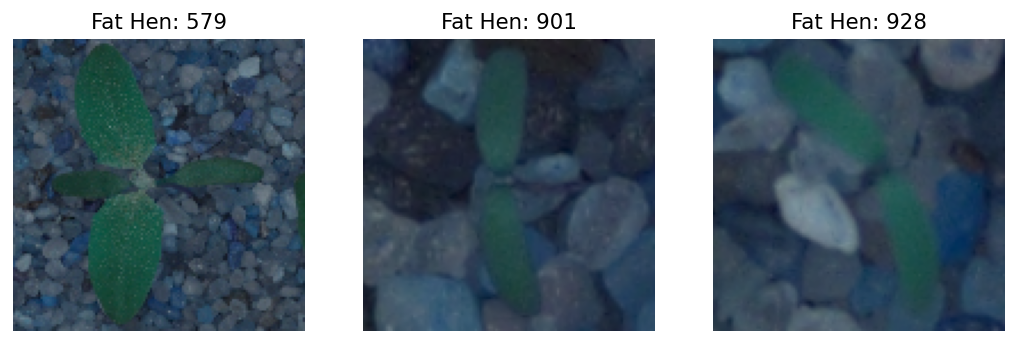

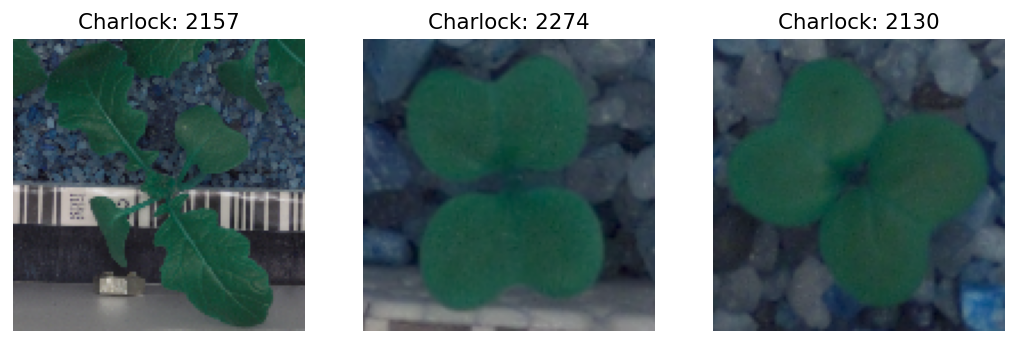

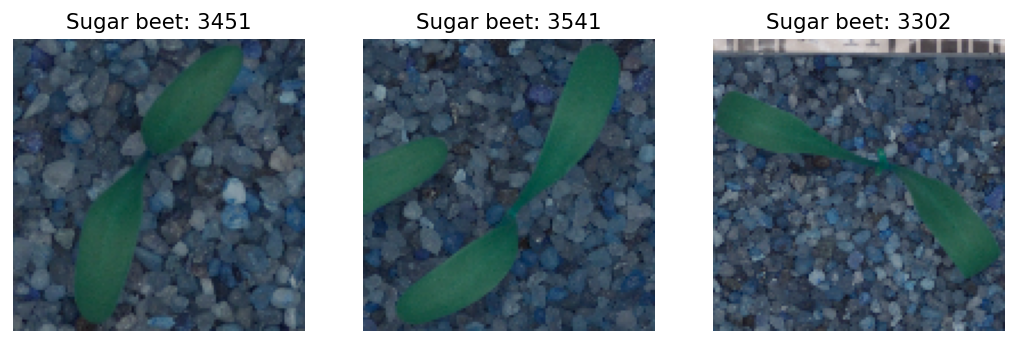

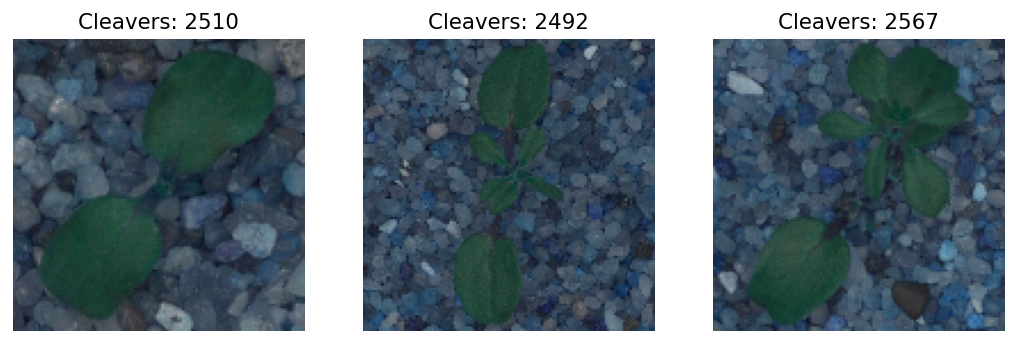

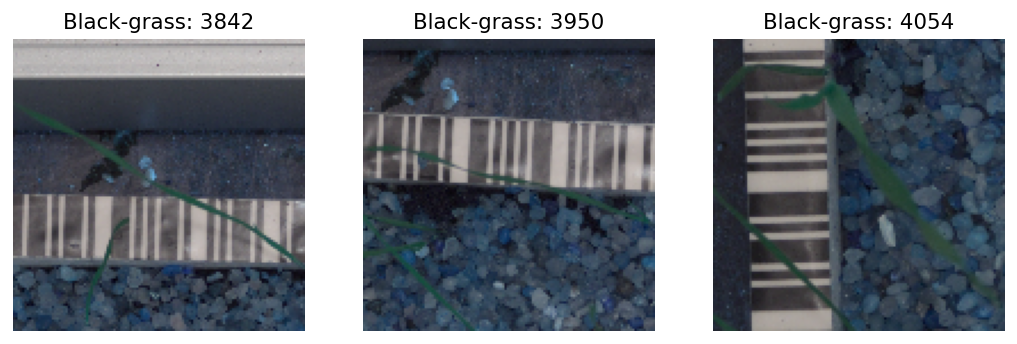

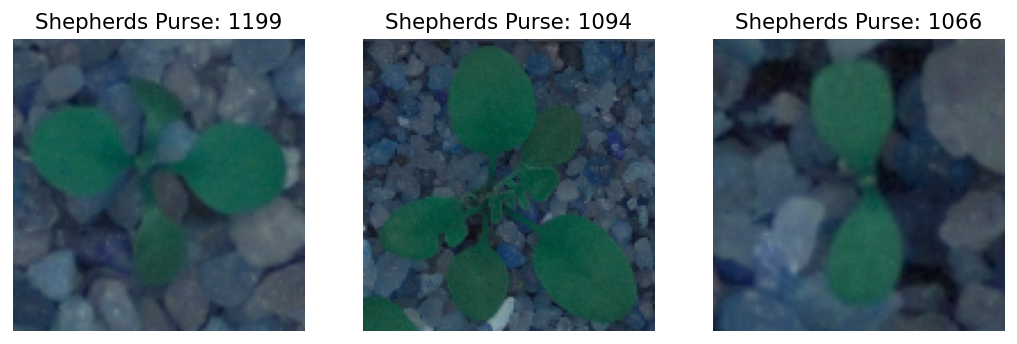

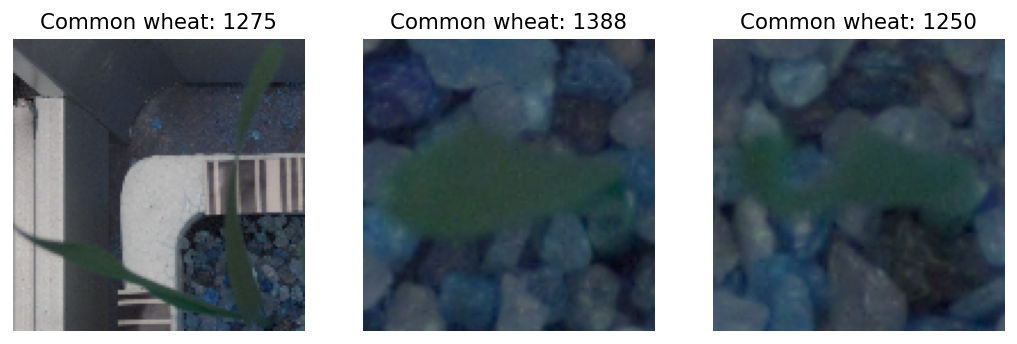

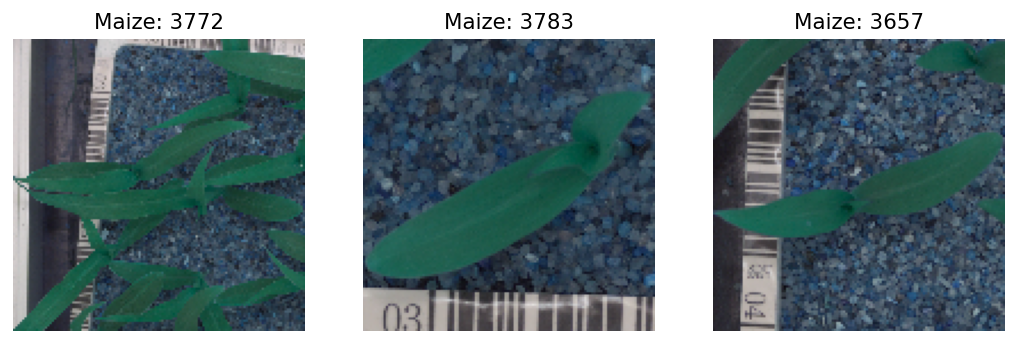

In [210]:
# randomly pick 3 images of each class and display them
# filter the label_data by unique seedling, so only one kind will be considered at a time
# randomly select 3 indices
# display each of the 3 randomly selected items
# repeat process for all 12 seedling types
for seedling in unique_labels:
    rand_pick_three = np.random.choice(label_data[label_data.Label == seedling].index, 3, replace=True)
    # display images using matplotlib, which uses RGB
    plt.figure(figsize=(10,10) , dpi=128)
    splot = plt.subplot(1,3,1)
    splot.set_title(seedling + ': {0}'.format(rand_pick_three[0]))
    splot.imshow(image_data[rand_pick_three[0]]);  
    plt.axis('off')
    splot = plt.subplot(1,3,2)
    splot.set_title(seedling + ': {0}'.format(rand_pick_three[1]))
    splot.imshow(image_data[rand_pick_three[1]]);
    plt.axis('off')
    splot = plt.subplot(1,3,3)
    splot.set_title(seedling + ': {0}'.format(rand_pick_three[2]))
    splot.imshow(image_data[rand_pick_three[2]]);   
    plt.axis('off')
    plt.show()

In [ ]:
#plt.imshow(image_data[4], cmap=plt.cm.gray) # rand_pick_three[1]

#cv2.imshow(image_data[4])
# cv2.imshow('image window',image_data[4])
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [ ]:
display(image_data[4])

### Exploratory Data Analysis on Images

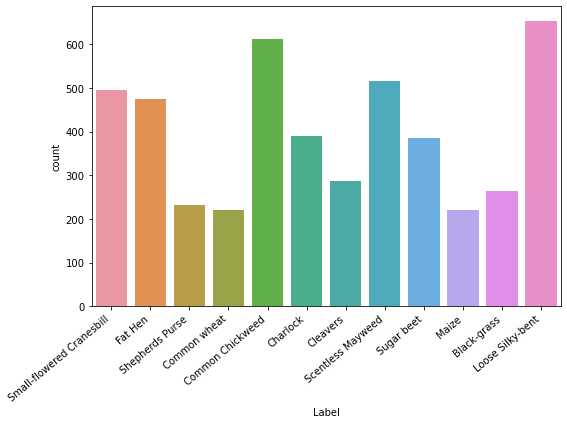

In [170]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x='Label', data=label_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()